**`plotly`** :  인터랙티브한 그래프를 그릴 수 있는 라이브러리

인터랙티브한 그래프를 html로 저장하기 용이합니다.

## **[1] 기본 문법**
```
fig = px.그래프종류(data_frame=데이터, x=X축 컬럼, y=Y축 컬럼, color=범례 컬럼, title=제목,
                 labels=dict(X축 컬럼=X축 라벨, Y축 컬럼=Y축 라벨),
                 width=그래프 가로길이, height=그래프 세로길이, text_auto=True/False)
fig.show()
```



In [1]:
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = sns.load_dataset('penguins')
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [3]:
df_groupby = df.groupby('species')[['body_mass_g']].mean().reset_index()
df_groupby

,species,body_mass_g
0,Adelie,3700.662252
1,Chinstrap,3733.088235
2,Gentoo,5076.016260


<Axes: xlabel='species', ylabel='body_mass_g'>

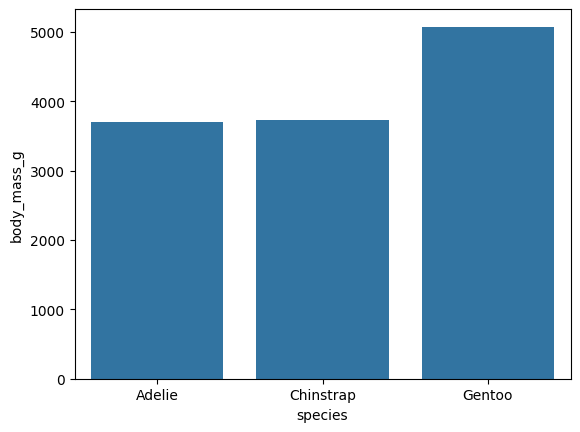

In [4]:
sns.barplot(data=df_groupby, x='species', y='body_mass_g')

In [5]:
fig = px.bar(df_groupby, x='species', y='body_mass_g')
fig.show()

In [6]:
df_groupby1 = df.groupby(['island','sex'])[['body_mass_g']].mean().reset_index()
df_groupby1

,island,sex,body_mass_g
0,Biscoe,Female,4319.375000
1,Biscoe,Male,5104.518072
2,Dream,Female,3446.311475
3,Dream,Male,3987.096774
4,Torgersen,Female,3395.833333
5,Torgersen,Male,4034.782609


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



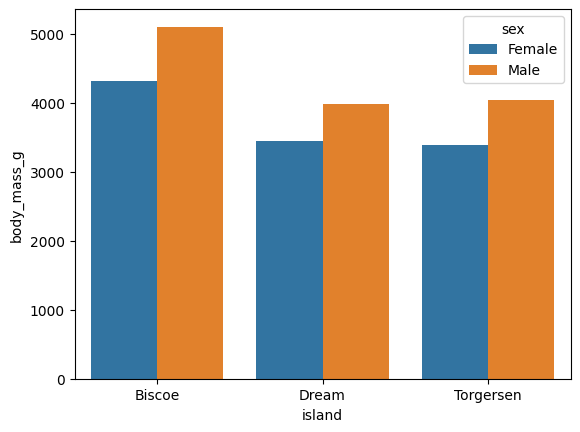

In [7]:
sns.barplot(data=df_groupby1, x="island", y="body_mass_g", hue="sex")
plt.show()

In [8]:
fig = px.bar(data_frame=df_groupby1, x='island', y='body_mass_g', color='sex')
fig.show()

In [9]:
fig = px.bar(data_frame=df_groupby1, x='island', y='body_mass_g', color='sex', barmode='group', text_auto='.0d', width=700, height=500, title='island별 몸무게 평균', labels=dict(body_mass_g='몸무게(g)', island='', sex='성별'))
fig.show()

## **[2] 스타일 설정하기**


```
template=템플릿명
color_discrete_sequence = 컬러맵명 #범주형 데이터
color_continuous_scale= 컬러맵명 #연속형 데이터
```



- 템플릿 적용

In [ ]:
for temp in ['ggplot2', 'seaborn', 'simple_white', 'plotly', 'plotly_white', 'plotly_dark']:
    fig = px.bar(data_frame=df_groupby1, x='island', y='body_mass_g', color='sex', barmode='group', text_auto='.0d', width=700, height=500, title=f'템플릿: {temp}', labels=dict(body_mass_g='몸무게(g)', island='', sex='성별'), template=temp)
    fig.show()

- 색상팔레트 생성

In [ ]:
fig = px.colors.sequential.swatches_continuous() #Plotly의 연속 색상 팔레트를 시각적으로 보여주는 스와치를 생성
fig.show()

In [ ]:
fig = px.colors.qualitative.swatches() #Plotly에서 제공하는 범주형 색상 팔레트를 시각적으로 보여주는 색상 견본을 생성
fig.show()

- 컬러맵 적용

In [12]:
for color_map in [px.colors.qualitative.Pastel1, px.colors.qualitative.Safe, px.colors.qualitative.Antique]:
    fig = px.bar(data_frame=df_groupby1, x='sex', y='body_mass_g', color='island', barmode='group', text_auto='.0d', width=700, height=500, color_discrete_sequence=color_map)
    fig.show()

In [13]:
for color_map in [px.colors.sequential.Burg, px.colors.sequential.Mint, px.colors.sequential.PuBuGn]:
    fig = px.scatter(data_frame=df, x='bill_length_mm', y='bill_depth_mm', color='flipper_length_mm', width=700, height=500, color_continuous_scale=color_map, template='simple_white')
    fig.show()

## **[3] HTML 파일로 저장하기**


```
fig.write_html(파일경로 및 파일명)
```



In [14]:
fig = px.scatter(data_frame=df, x='bill_length_mm', y='bill_depth_mm', color='flipper_length_mm', width=700, height=500, color_continuous_scale=px.colors.sequential.PuBuGn, template='plotly_white')
fig.show()
fig.write_html('test.html')

## html은 코랩 기준 '좌측 폴더'에 저장됨 -> 다운로드 필요

# **plotly로 유형별 그래프 그리기**

## **[1] 산점도**


```
px.scatter(data_frame=데이터, x=X축 컬럼, y=Y축 컬럼, color=색, trendline='ols') #trendline은 추세선 추가
```

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [16]:
penguins = sns.load_dataset('penguins')

In [17]:
fig = px.scatter(data_frame=penguins, x='bill_length_mm', y='bill_depth_mm'
, color_discrete_sequence=px.colors.qualitative.Set2, template='plotly_white')
fig.show()

In [18]:
fig = px.scatter(data_frame=penguins, x='bill_length_mm', y='bill_depth_mm', color='sex'
, color_discrete_sequence=px.colors.qualitative.Set2, template='plotly_white')
fig.show()

In [19]:
fig = px.scatter(data_frame=penguins, x='bill_length_mm', y='bill_depth_mm', color='island', symbol='sex'
, color_discrete_sequence=px.colors.qualitative.Set2, template='plotly_white')
fig.show()

In [20]:
fig = px.scatter(data_frame=penguins, x='bill_length_mm', y='bill_depth_mm', color='sex', facet_col='island'
, color_discrete_sequence=px.colors.qualitative.Set2, template='plotly_white')
fig.show()

In [21]:
fig = px.scatter(data_frame=penguins, x='bill_length_mm', y='bill_depth_mm', trendline='ols'
, color_discrete_sequence=px.colors.qualitative.Set2, template='plotly_white')
fig.show()

In [22]:
fig = px.scatter(data_frame=penguins, x='bill_length_mm', y='bill_depth_mm', color='sex', facet_col='island', trendline='ols'
, color_discrete_sequence=px.colors.qualitative.Set2, template='plotly_white')
fig.show()

## **[2] 분포 살펴보기**


```
px.histogram(data_frame=데이터, x=X축 컬럼, color=색) #히스토그램
px.box(data_frame=데이터, x=X축 컬럼, y=Y축 컬럼, color=색) #상자그림
```



### **히스토그램**

In [23]:
fig = px.histogram(data_frame=penguins, x='flipper_length_mm', color_discrete_sequence=px.colors.qualitative.Set2, template='plotly_white')
fig.show()

## **상자그림**

In [24]:
fig = px.box(data_frame=penguins, x='body_mass_g', color_discrete_sequence=px.colors.qualitative.Set2, template='plotly_white')
fig.show()

In [25]:
fig = px.box(data_frame=penguins, x='body_mass_g', y='species', color='sex'
, color_discrete_sequence=px.colors.qualitative.Set2, template='plotly_white')
fig.show()

## **[3] 막대 그래프**


```
px.bar(data_frame=데이터, x=X축 컬럼, y=Y축 컬럼, color=색, barmode='group') #쌓아서 올리지 않으면 barmode = 'group'을 추가한다
```



In [26]:
titanic = sns.load_dataset('titanic')

In [27]:
titanic_groupby = titanic.groupby(['sex','class'])[['survived']].mean().reset_index()

<ipython-input-27-ddc4bb13bc58>:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [28]:
fig = px.bar(data_frame=titanic_groupby, x='class', y='survived', color='sex'
, color_discrete_sequence=px.colors.qualitative.Set2, template='plotly_white')
fig.show()

In [29]:
fig = px.bar(data_frame=titanic_groupby, x='class', y='survived', color='sex', barmode='group'
, color_discrete_sequence=px.colors.qualitative.Set2, template='plotly_white')
fig.show()

In [30]:
fig = px.bar(data_frame=titanic_groupby, x='class', y='survived', color='sex', barmode='group', text_auto='.2f'
, color_discrete_sequence=px.colors.qualitative.Set2, template='plotly_white')
fig.show()

In [31]:
titanic_groupby1 = titanic.groupby(['sex','class','alone'])[['survived']].mean().reset_index()
titanic_groupby1

<ipython-input-31-bf767f8daa6d>:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,sex,class,alone,survived
0,female,First,False,0.966667
1,female,First,True,0.970588
2,female,Second,False,0.931818
3,female,Second,True,0.906250
4,female,Third,False,0.416667
5,female,Third,True,0.616667
6,male,First,False,0.425532
7,male,First,True,0.333333
8,male,Second,False,0.277778
9,male,Second,True,0.097222


In [32]:
fig = px.bar(data_frame=titanic_groupby1, x='class', y='survived', color='sex', facet_col='alone', barmode='group', text_auto='.2f'
, color_discrete_sequence=px.colors.qualitative.Set2, template='plotly_white')
fig.show()

## **[4] 선그래프**


```
px.line(data_frame=데이터, x=X축 컬럼, y=Y축 컬럼, color=색)
```



In [34]:
flights = sns.load_dataset("flights")

In [35]:
may_flights = flights.query('month == "May"')
fig = px.line(data_frame=may_flights, x="year", y="passengers"
, color_discrete_sequence=px.colors.qualitative.Set2, template='plotly_white')
fig.show()

In [36]:
fig = px.line(data_frame=flights, x="year", y="passengers", color='month'
, color_discrete_sequence=px.colors.qualitative.Set2, template='plotly_white')
fig.show()

## **[5] 히트맵**


```
px.imshow(데이터, text_auto=텍스트포맷, color_continuous_scale=컬러맵)
```



In [37]:
titanic_corr = titanic[['survived','age','fare','sibsp','pclass']].corr()

In [38]:
fig = px.imshow(titanic_corr, text_auto='.2f', color_continuous_scale='YlOrBr')
fig.show()

In [39]:
titanic_pivot = pd.pivot_table(data=titanic, index='sex', columns='class', values='survived', aggfunc='mean')

<ipython-input-39-307ddfdf412c>:1: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



In [40]:
fig = px.imshow(titanic_pivot, text_auto='.2f', color_continuous_scale='Purples')
fig.show()

## **[6] 파이차트**


```
px.pie(data_frame=데이터, values=값, names=라벨)
```



In [41]:
df = px.data.tips()

In [43]:
fig = px.pie(df, values='tip', names='day', color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()

#color_discrete_sequence 매개변수는 각 파이 조각에 사용할 색상 팔레트를 지정
#여기서는 px.colors.qualitative.Pastel을 사용하여 부드러운 색상을 선택
#이 팔레트는 범주형 데이터에 적합한 연한 색상을 제공

In [44]:
df.groupby('day')[['tip']].sum()

,tip
day,
Fri,51.96
Sat,260.40
Sun,247.39
Thur,171.83
